In [41]:
file_path='C:\\Users\\IKG\\Downloads\\bank_data.csv'

In [65]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
from scipy.stats import kruskal , chi2_contingency
import statsmodels.api as sm

In [44]:
data_frame=pd.read_csv(file_path)

In [45]:
data_frame.head(10)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
5,731,548,520.710,Level 0 Recovery,35,Male
6,221,549,221.585,Level 0 Recovery,33,Male
7,1932,560,373.720,Level 0 Recovery,19,Female
8,1828,562,201.865,Level 0 Recovery,22,Female
9,2001,565,504.885,Level 0 Recovery,27,Male


In [46]:
data_frame.tail(10)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1872,1606,9609,19858.289550,Level 4 Recovery,68,Male
1873,1618,9621,23794.832650,Level 4 Recovery,57,Female
1874,1372,9690,13749.625000,Level 4 Recovery,72,Male
1875,461,9742,28305.006250,Level 4 Recovery,59,Male
1876,693,9753,20018.690730,Level 4 Recovery,54,Male
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


# Statistical test: age vs. expected recovery amount

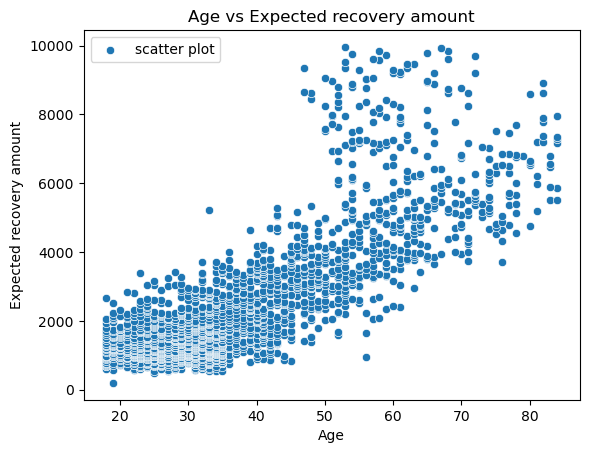

In [47]:
snb.scatterplot(data=data_frame ,x='age',y='expected_recovery_amount',label='scatter plot')
plt.xlabel('Age')
plt.ylabel('Expected recovery amount')
plt.title('Age vs Expected recovery amount')
plt.show()

In [53]:
data_frame_900_1100 = data_frame.loc[(data_frame['expected_recovery_amount'] < 1100) & (data_frame['expected_recovery_amount'] > 900)]

In [54]:
data_frame_900_1100

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
161,998,901,887.005000,Level 0 Recovery,32,Male
162,1351,903,667.035000,Level 0 Recovery,28,Male
163,2028,905,586.960000,Level 0 Recovery,35,Female
164,1943,906,874.560000,Level 0 Recovery,29,Male
165,559,907,317.335000,Level 0 Recovery,21,Male
...,...,...,...,...,...,...
336,1184,1096,1077.218384,Level 1 Recovery,38,Male
337,1664,1096,2053.290126,Level 1 Recovery,18,Female
338,302,1098,876.997775,Level 1 Recovery,34,Male
339,554,1098,1836.918718,Level 1 Recovery,26,Female


In [55]:
by_recovery_strategy = data_frame_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()
Level_0_age = data_frame_900_1100.loc[data_frame['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = data_frame_900_1100.loc[data_frame['recovery_strategy']=="Level 1 Recovery"]['age']
kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=4.07049020073799, pvalue=0.04363860858046107)

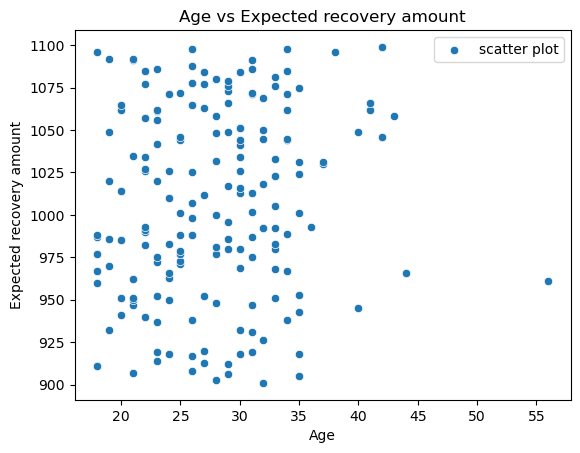

In [14]:
snb.scatterplot(data=new_data ,x='age',y='expected_recovery_amount',label='scatter plot')
plt.xlabel('Age')
plt.ylabel('Expected recovery amount')
plt.title('Age vs Expected recovery amount')
plt.show()

In [60]:
crosstab = pd.crosstab(data_frame.loc[(data_frame['expected_recovery_amount']<2000) & (data_frame['expected_recovery_amount']>=0)]['recovery_strategy'],data_frame['sex'])
print(crosstab)

# Chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(crosstab)
print(p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery      108   139
Level 1 Recovery      316   354
0.3941650543686612


# Exploratory graphical analysis: recovery amount

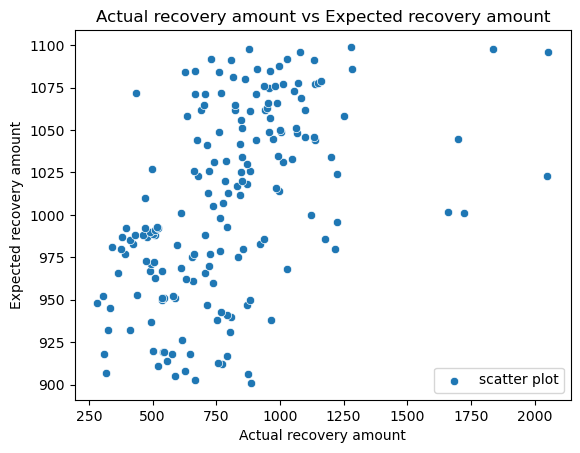

In [61]:
snb.scatterplot(data=data_frame_900_1100 ,x='actual_recovery_amount',y='expected_recovery_amount',label='scatter plot')
plt.xlabel('Actual recovery amount')
plt.ylabel('Expected recovery amount')
plt.title('Actual recovery amount vs Expected recovery amount')
plt.show()

In [62]:
data_frame_950_1050 = data_frame[(data_frame['expected_recovery_amount'] < 1050) & (data_frame['expected_recovery_amount'] > 950)]

# Statistical analysis: recovery amount

In [63]:
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_actual = data_frame_900_1100.loc[data_frame['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = data_frame_900_1100.loc[data_frame['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(kruskal(Level_0_actual, Level_1_actual))

# Repeat for a smaller range of $950 to $1050
Level_0_actual = data_frame_950_1050.loc[data_frame['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = data_frame_950_1050.loc[data_frame['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
kruskal(Level_0_actual, Level_1_actual)

KruskalResult(statistic=62.65452527467119, pvalue=2.463383030679213e-15)


KruskalResult(statistic=30.648790562537158, pvalue=3.0921928648481067e-08)

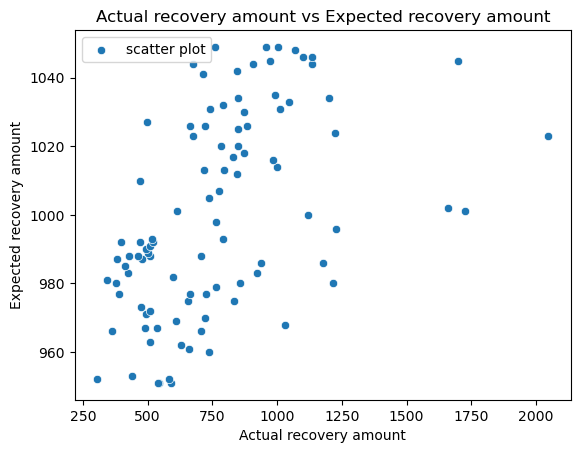

In [64]:
snb.scatterplot(data=data_frame_950_1050 ,x='actual_recovery_amount',y='expected_recovery_amount',label='scatter plot')
plt.xlabel('Actual recovery amount')
plt.ylabel('Expected recovery amount')
plt.title('Actual recovery amount vs Expected recovery amount')
plt.show()

# Regression modeling: no threshold

In [66]:
X = data_frame_900_1100['expected_recovery_amount']
y = data_frame_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

In [67]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.252
Model:                                OLS   Adj. R-squared:                  0.247
Method:                     Least Squares   F-statistic:                     59.85
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           7.34e-13
Time:                            20:29:57   Log-Likelihood:                -1259.4
No. Observations:                     180   AIC:                             2523.
Df Residuals:                         178   BIC:                             2529.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1996.8813    361.866     -5.518      0.000   -2710.981   -1282.781
expected_recovery_amount     2.7752      0.359      7.736      0.000       2.067       3.483
==============================================================================
Omnibus:                       62.774   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.592
Skew:                           1.455   Prob(JB):                     7.42e-39
Kurtosis:                       6.866   Cond. No.                     1.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression modeling: adding true threshold

In [69]:
data_frame['indicator_1000'] = np.where(data_frame['expected_recovery_amount']<1000, 0, 1)
data_frame_900_1100_indi = data_frame.loc[(data_frame['expected_recovery_amount']<1100) &
                      (data_frame['expected_recovery_amount']>=900)]

In [70]:
X = data_frame_900_1100_indi['expected_recovery_amount']
y = data_frame_900_1100_indi['actual_recovery_amount']
X = sm.add_constant(X)

In [71]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           1.56e-13
Time:                            20:33:44   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression modeling: adjusting the window

In [73]:
data_frame_950_1050_indi = data_frame.loc[(data_frame['expected_recovery_amount']<1050) &
                      (data_frame['expected_recovery_amount']>=950)]
X = data_frame_950_1050_indi[['expected_recovery_amount','indicator_1000']]
y = data_frame_950_1050_indi['actual_recovery_amount']
X = sm.add_constant(X)

In [74]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           1.12e-07
Time:                            20:37:06   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""